# Creating and saving a single task dataset from predefined tasks

### Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from wisdom import make
from wisdom import read_write
import wisdom.envs.shapenet.task_generator as tg

import json
import os
import shutil
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Constant Definitions

- Here we define generation parameters and the ShapeNet environment object
    - NOTE: here we will be generating training data. For validation data you must specify a validation stimulus and set train=False. 

In [6]:
output_dir = 'outputs/trials/train' 
stim_dir = '../data/shapenet_handpicked_train'
n_tasks = 100 # number of tasks to be generated

env = make(
    env_id='ShapeNet',
    dataset_fp=stim_dir
)
print(env.env_spec.auto_gen_config)

# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir)

{'op_dict': {'Select': {'n_downstream': 4, 'downstream': ['GetLoc', 'GetCategory', 'GetObject'], 'same_children_op': False, 'min_depth': 1, 'min_op': 1}, 'GetCategory': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetLoc': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'GetObject': {'n_downstream': 1, 'downstream': ['Select'], 'min_depth': 2, 'min_op': 2}, 'IsSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'NotSame': {'n_downstream': 2, 'downstream': ['GetLoc', 'GetCategory', 'GetObject', 'CONST'], 'sample_dist': [0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2], 'same_children_op': True, 'min_depth': 3, 'min_op': 7}, 'And': {'n_downstream': 2, 'downstream': ['IsSame', 'NotSame', 'And', 'Or'], 'same_children_op': False, 'min_de

- Generate the tasks and write them to the output directory
- (remember to specify the correct mode for generation)

In [7]:
# Choose a task class (see task_bank or make your own see individual_task_gen.ipynb)
task = tg.read_task('outputs/tasks/comp_loc_task.json')

for i in range(n_tasks):
    
    # Generate trial info
    trials = env.generate_trials(tasks=[task], mode='train')
    imgs, _, info_dict = trials[0]

    # Write trial to disk
    read_write.write_trial(imgs, info_dict, output_dir + f'/trial{i}')

- Read and display one of the written trials

instruction  observe object 1, delay, observe object 2, location of object 2 equals location of object 1?
answers:  ['null', 'null', 'null', 'null', 'true']


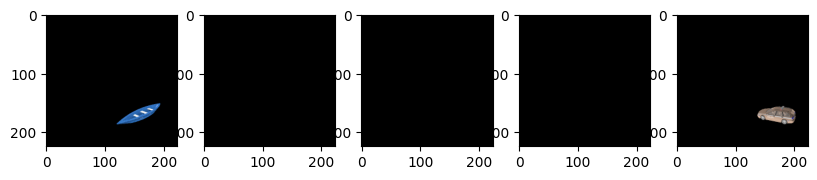

In [15]:
images = []

for img_path in sorted(glob.glob('outputs/trials/train/trial0/frames/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10

for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)

with open('outputs/trials/train/trial0/frames/task_info.json') as f:
    trial_info = json.load(f)

print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])